## 整体评论爬取，数据处理与可视化分析罗翔老师 '女子取快递被偷拍造谣，什么都没做，却被社会性死亡' 视频：bilibili.com/video/BV1iX4y1u7Rx
## Python 3.8 Jupyter Notebook

### 爬取程序代码

In [3]:
import json, requests
import pandas as pd
from datetime import *
import time


def get_base_info(oid):
    base_info_url = f'https://api.bilibili.com/x/web-interface/archive/stat?aid={oid}'
    base_info = requests.get(base_info_url, headers=dic_header).json()['data']
    # print(base_info) #可以输出转化为json形式的数据
    print('视频基本信息：\n')
    print('播放数量：{}\n弹幕数量：{}\n收藏数量：{}\n硬币数量：{}\n分享数量：{}\n点赞数量：{}\n------\n评论数量：{}'.format(
        base_info['view'], base_info['danmaku'], base_info['favorite'],
        base_info['coin'], base_info['share'], base_info['like'], base_info['reply']
    ))


if __name__ == '__main__':
    dic_header = {'User-Agent': 'Mozilla/5.0'}
    oid = 713247780
    # oid = 713247780
    get_base_info(oid)


def get_comment_datas(oid):
    comment_url = 'https://api.bilibili.com/x/v2/reply'
    comment_page = 1
    comment_data_lst = []
    while True:
        try:
            param = {'callback': 'jQuery172002097397522090838_' + str(now_time),
                     'jsonp': 'jsonp',
                     'pn': comment_page,
                     'type': '1',
                     'oid': oid,
                     'sort': '2',
                     '_': now_time}

            html = requests.get(url=comment_url, headers=dic_header, params=param)
            start = html.text.index('{')
            end = html.text.index('})') + 1
            comment_data = json.loads(html.text[start:end])['data']['replies']
            # print(comment_data) #成功的转换为json数据
            print(f'当前正在爬取第{comment_page}页评论数据...')
            dic_coment = None
            for data in comment_data:
                dic_coment = {}
                dic_coment['member'] = data['member']['uname']
                dic_coment['sex'] = data['member']['sex']
                dic_coment['Level'] = data['member']['level_info']['current_level']
                dic_coment['rcount'] = data['rcount']
                dic_coment['like'] = data['like']
                dic_coment['comment'] = data['content']['message']
                dic_coment['time'] = datetime.fromtimestamp(data['ctime'])
                dic_coment['rpid'] = data['rpid_str']
                comment_data_lst.append(dic_coment)
                print('昵称: {}\n点赞数：{}\n'.format(dic_coment['member'],
                                                dic_coment['like']))
                comment_data_lst.extend(get_reply_data(comment_page,dic_coment['rpid']))
                # 这个是下一步封装完爬取回复数据的函数后才添加的

            time.sleep(3)
            # 			if comment_page > 1:
            # 				break
            comment_page += 1

        except Exception as Comment_Page_Error:
            break

    return comment_data_lst

def get_reply_data(comment_page,rpid):
    reply_page = 1
    reply_data_lst =[]
    while True:
        print('正在爬取第{}页评论数据中的第{}页的回复数据......'.format(comment_page,reply_page))
        reply_url = 'https://api.bilibili.com/x/v2/reply/reply?&pn={}&type=1&oid=713247780&ps=10&root={}'.format(reply_page,rpid)
        html = requests.get(url=reply_url, headers=dic_header)
        reply_data = html.json()['data']['replies']
        try:
            for data in reply_data:
                dic_reply = {}
                dic_reply['comment'] = data['content']['message']
                dic_reply['member'] = data['member']['uname']
                dic_reply['sex'] = data['member']['sex']
                dic_reply['Level'] = data['member']['level_info']['current_level']
                dic_reply['like'] = data['like']
                dic_reply['time'] = datetime.fromtimestamp(data['ctime'])
                reply_data_lst.append(dic_reply)
                print('昵称: {}\n点赞数：{}\n'.format(dic_reply['member'],
                        dic_reply['like'] ))


# 			if reply_page > 1:
# 				break
            reply_page += 1
        except Exception as Reply_Page_Error:
            break

    return reply_data_lst

if __name__ =='__main__':
    dic_header = {
    'User. Agent ': 'Mozilla/5.8',
    'Referer': 'https://www.bilibili.com/video/BV1iX4y1u7Rx'
    }
    oid = 713247780
    now_time = int(time.time()*1000)
    # get_ base. info(2616308358)
    df = pd.DataFrame(get_comment_datas(oid))
    df.to_csv('test101.csv', mode='a', index=False, sep=',', header=False, encoding="utf_8_sig")
    print(df.head())
    print(len(df))


视频基本信息：

播放数量：2748943
弹幕数量：17033
收藏数量：34863
硬币数量：120483
分享数量：10201
点赞数量：272432
------
评论数量：9135
当前正在爬取第1页评论数据...
昵称: QAQ小宇啊
点赞数：32637

正在爬取第1页评论数据中的第1页的回复数据......
昵称: 我的头像针不戳
点赞数：8

昵称: 框框-框框框-
点赞数：10

昵称: wangwang-bilibil
点赞数：286

昵称: 我红了吗
点赞数：33

昵称: 不上600补钙吗
点赞数：3

昵称: 螃蟹小一啊
点赞数：3

昵称: Y7一只大香蕉
点赞数：91

昵称: 太初-素
点赞数：0

昵称: _小逆袭_
点赞数：0

正在爬取第1页评论数据中的第2页的回复数据......
昵称: 从零开始的三级号
点赞数：19

昵称: 七岛邮集
点赞数：73

昵称: Asion1
点赞数：5

昵称: 这波划得来
点赞数：3

昵称: 这就离谱aaaaaa
点赞数：0

昵称: 洗铁路的李阿姨
点赞数：0

昵称: 武魂键盘
点赞数：0

昵称: 天天丶白给
点赞数：5

昵称: 遮某人
点赞数：1

昵称: 可乐罐Cola_Can
点赞数：1

正在爬取第1页评论数据中的第3页的回复数据......
昵称: 不剪头发的托尼老师丶
点赞数：5

昵称: 小林桃子Official
点赞数：0

昵称: 堆沙子的吉克
点赞数：0

昵称: 精神病院长不怕精神病
点赞数：4

昵称: 玩游戏不坑的汐冻
点赞数：12

昵称: 狼魂还未觉醒
点赞数：0

昵称: 西风留旧梦
点赞数：0

昵称: 神秘的名字DX
点赞数：0

昵称: 洛小悠丶
点赞数：1

昵称: 无人认领的小柯基
点赞数：2

正在爬取第1页评论数据中的第4页的回复数据......
昵称: 南国辰风
点赞数：1

昵称: 风尘拂满头
点赞数：5

昵称: 停车场施工好吵啊
点赞数：4

昵称: 喵星人赏我
点赞数：2

昵称: 二一条
点赞数：4

昵称: 美国水王
点赞数：1

昵称: 勤俭持家由崎司
点赞数：0

昵称: 蓝雨之泪
点赞数：6

昵称: 万卢克
点赞数：0

昵称: 祁秽
点赞数：2

正在爬取第1页评论数据中的第5页的回复数据......
昵称

昵称: B站小才子
点赞数：2

昵称: 幻迷麟
点赞数：1

昵称: 桜時雨
点赞数：1

昵称: nikeadidasYANHE
点赞数：3

昵称: 人本是人人本是神
点赞数：0

昵称: 士天十
点赞数：1

昵称: 重生工作室CN分室
点赞数：0

昵称: 不可修复的bug
点赞数：0

昵称: 不可修复的bug
点赞数：0

正在爬取第1页评论数据中的第28页的回复数据......
昵称: 故影ZS
点赞数：0

昵称: 故影ZS
点赞数：0

昵称: 故影ZS
点赞数：0

昵称: 故影ZS
点赞数：0

昵称: 小天使马利什么么么么
点赞数：0

昵称: 故影ZS
点赞数：0

昵称: 故影ZS
点赞数：0

正在爬取第1页评论数据中的第29页的回复数据......
昵称: 西岸的小企鹅
点赞数：0

昵称: 故影ZS
点赞数：0

昵称: 故影ZS
点赞数：0

昵称: 一击
点赞数：1

昵称: 吃饭_群众
点赞数：0

昵称: 故影ZS
点赞数：0

昵称: Salida_Knight
点赞数：0

昵称: Lurantis兰螳花
点赞数：0

昵称: 永远相信质量守恒定律
点赞数：0

正在爬取第1页评论数据中的第30页的回复数据......
昵称: 洁莉柯基
点赞数：0

昵称: 修不完的眉毛君
点赞数：1

昵称: -天启-
点赞数：0

昵称: 温水炒凉白开m
点赞数：0

昵称: 总被打的酱油君丶
点赞数：1

昵称: 洛河之渊
点赞数：0

昵称: 91245756133_bili
点赞数：0

昵称: 天堂没有自我了
点赞数：0

昵称: 圆气少女诸葛钢铁
点赞数：0

昵称: 陌雨微凉夜
点赞数：0

正在爬取第1页评论数据中的第31页的回复数据......
昵称: 飞艇人
点赞数：0

昵称: -戍尧-
点赞数：0

昵称: battlecry824
点赞数：0

昵称: Scarlet-Mirror
点赞数：0

昵称: bohemia_sky
点赞数：0

昵称: 不填土
点赞数：0

昵称: 玄烨来了
点赞数：0

昵称: 山涛九里虎
点赞数：0

昵称: 宇略略略
点赞数：0

昵称: YoMessman
点赞数：0

正在爬取第1页评论数据中的第32页的回复数据......
昵称: 佳人如心
点赞数：0

昵称: w

昵称: 快乐浪一天
点赞数：9

昵称: 快乐浪一天
点赞数：5

昵称: 你能跑到哪去
点赞数：3

昵称: 卑怯な福田君
点赞数：9

昵称: 罗志祥运动拥护者
点赞数：15

昵称: 王卿之
点赞数：0

昵称: 云泪风干
点赞数：2

昵称: 哎呀小恶魔
点赞数：1

正在爬取第1页评论数据中的第6页的回复数据......
昵称: 骸葬无铭
点赞数：2

昵称: 罗志祥运动拥护者
点赞数：6

昵称: Matilda守护她
点赞数：3

昵称: 足利将军家
点赞数：1

正在爬取第1页评论数据中的第7页的回复数据......
昵称: 琉璃骰子__
点赞数：1

昵称: 叄點
点赞数：1

昵称: 叄點
点赞数：1

昵称: 罗志祥运动拥护者
点赞数：2

昵称: 王卿之
点赞数：0

昵称: 叄點
点赞数：1

昵称: 蛙蛙的小脚趾盖
点赞数：1

昵称: 王卿之
点赞数：0

正在爬取第1页评论数据中的第8页的回复数据......
昵称: Iyloly
点赞数：2

昵称: 自寻苏梦不青
点赞数：0

昵称: 丨我想静静jing
点赞数：2

昵称: 阿尔托灬利亚
点赞数：1

昵称: 丶残余温存的消失
点赞数：0

昵称: 许梓云
点赞数：1

昵称: 92224197431_bili
点赞数：1

正在爬取第1页评论数据中的第9页的回复数据......
昵称: 沧海一支粟
点赞数：2

昵称: 寂落红枼
点赞数：1

昵称: 风中的独行者
点赞数：1

昵称: ge唱动荡的青春
点赞数：0

昵称: SF3铁鹰学院
点赞数：0

昵称: 陈阳陈小五
点赞数：1

正在爬取第1页评论数据中的第10页的回复数据......
昵称: 犬来捌荒w
点赞数：24405

正在爬取第1页评论数据中的第1页的回复数据......
昵称: 隔壁那猴儿
点赞数：8

昵称: 落ちぶれた道
点赞数：188

昵称: 羽毛落北川
点赞数：19

昵称: 羽毛落北川
点赞数：19

昵称: 丨不可描述丨
点赞数：13

昵称: 像我这么可爱的
点赞数：1098

昵称: 2020and1222
点赞数：0

昵称: 米奇妙妙o屋
点赞数：1

昵称: 米奇妙妙o屋
点赞数：0

昵称: 少年-方世玉
点赞数：0

正在爬取第1页评论数据中的第2页的回复数据......
昵称:

昵称: 敲爱喝冰红茶
点赞数：46

昵称: 不会玩AD的石斑鱼
点赞数：15

昵称: 老婆饼在逃老婆
点赞数：12

昵称: 祝老婆4_12生日快乐
点赞数：9

昵称: 越小在
点赞数：21

昵称: 伊吕波的奇妙日常
点赞数：24

昵称: 木木木言木木
点赞数：0

昵称: 喂dragonfly
点赞数：0

昵称: 不要乱弹广告了
点赞数：6

昵称: bili_17691414531
点赞数：23

正在爬取第1页评论数据中的第5页的回复数据......
昵称: 不要乱弹广告了
点赞数：8

昵称: 不要乱弹广告了
点赞数：16

昵称: 什么鬼懒懒懒
点赞数：22

昵称: 薄可
点赞数：9

昵称: 函宫徵音
点赞数：5

昵称: 松鼠大战外星人
点赞数：1

昵称: 市寻-
点赞数：5

昵称: 市寻-
点赞数：6

昵称: 某科学的超御坂网络
点赞数：4

正在爬取第1页评论数据中的第6页的回复数据......
昵称: 酥皮豆瓣
点赞数：0

昵称: 每天都得吃早餐
点赞数：0

昵称: 猫多狸
点赞数：0

昵称: vivien6223
点赞数：1

昵称: 浑然天成ycy
点赞数：1

昵称: 少宁sama
点赞数：3

正在爬取第1页评论数据中的第7页的回复数据......
昵称: x颜风
点赞数：2

昵称: 踏风赏雪
点赞数：0

昵称: 人间吃货小汤圆
点赞数：0

昵称: 小行星Q啾咪
点赞数：0

昵称: ヾ妙啊
点赞数：0

昵称: 媛媛媛并不圆
点赞数：0

昵称: -白桃carol-
点赞数：0

昵称: 天堂的锦鲤
点赞数：0

昵称: 薄可
点赞数：2

正在爬取第1页评论数据中的第8页的回复数据......
昵称: 污咪到底犯啥罪了
点赞数：0

昵称: bo良ki影第三炸弹
点赞数：2

昵称: -白桃carol-
点赞数：0

昵称: 寻娘子
点赞数：0

昵称: 谁说胖墩
点赞数：0

昵称: 秋风萧瑟ing
点赞数：0

昵称: 您吃饱撑到了吗
点赞数：0

昵称: 湫湫桃沢
点赞数：2

昵称: 贝津釧么么哒
点赞数：0

昵称: 墨墨夏夏呀
点赞数：0

正在爬取第1页评论数据中的第9页的回复数据......
昵称: 茜茜雨露露
点赞数：0

昵称: 伊吕波的奇妙日常
点赞数：0

昵称: 佐证阿斯兰
点

昵称: 虹色蜻蜓
点赞数：0

昵称: 聚乙二醇PEG
点赞数：4

昵称: 立志做个大厨
点赞数：1

昵称: 巧克力吃多会腻
点赞数：0

昵称: 浮士德贵人
点赞数：5

昵称: 觉醒却悲伤
点赞数：3

昵称: 浑圆松果糖豆真君
点赞数：7

昵称: 呆萌的A-Ling
点赞数：0

昵称: 立志做个大厨
点赞数：0

正在爬取第1页评论数据中的第6页的回复数据......
昵称: 即将中奖的快剥
点赞数：4

昵称: Snow-L
点赞数：1

昵称: 极限断魂
点赞数：0

昵称: 十元小阔爱
点赞数：7

昵称: Jaeger耶格
点赞数：2

昵称: 江影醉
点赞数：5

昵称: 吸猫者丶小白
点赞数：1

昵称: 白银桃
点赞数：9

昵称: 无敌小菠萝
点赞数：2

昵称: 一只忧郁的喵
点赞数：1

正在爬取第1页评论数据中的第7页的回复数据......
昵称: 大笑君
点赞数：0

昵称: 頋事2018
点赞数：0

昵称: 丿Sakura最好啦丶
点赞数：0

昵称: 乱花水云暖
点赞数：0

昵称: ASTRAYRMOR
点赞数：0

昵称: 不秀想秀
点赞数：1

昵称: 小雨1071
点赞数：0

昵称: 358团团长楚云妃
点赞数：0

昵称: 阿松带你看魔术
点赞数：0

正在爬取第1页评论数据中的第8页的回复数据......
昵称: 千璃姑娘
点赞数：0

昵称: 尢里大人
点赞数：2

昵称: 米羅_
点赞数：2

昵称: 樱花祭的阳子
点赞数：0

昵称: 阿子花啊
点赞数：0

昵称: 猫头鹰打坐
点赞数：2

昵称: 不是猛男是萌男
点赞数：0

昵称: 青灯罟佛
点赞数：1

正在爬取第1页评论数据中的第9页的回复数据......
昵称: DAYANGH
点赞数：0

昵称: 加油丨打工人
点赞数：0

昵称: 只想暴富的猪
点赞数：1

昵称: 一阵阴风吹来
点赞数：0

昵称: 市寻-
点赞数：1

昵称: 青春永远在一起
点赞数：1

昵称: 孤岛宠儿
点赞数：1

昵称: 哩哔精神病院张主任
点赞数：1

正在爬取第1页评论数据中的第10页的回复数据......
昵称: 一人独唱胡不归
点赞数：0

昵称: Zoey有颗大蘑菇
点赞数：0

昵称: 吃草的平果
点赞数：0

昵称: 秋子泥
点赞数：1

昵称:

昵称: 朕乃龙神
点赞数：1

昵称: 二喵家的长工
点赞数：0

昵称: 总抽不到莫弈的b
点赞数：0

昵称: 可达咿鸭咿呀哟
点赞数：0

昵称: 虚良
点赞数：0

昵称: 陈醇
点赞数：2

昵称: 你别逗了好不好呀
点赞数：1

昵称: 易狩
点赞数：0

昵称: 龙虾皮蛋
点赞数：0

正在爬取第1页评论数据中的第5页的回复数据......
昵称: 神无卯月
点赞数：0

昵称: 左耳凍
点赞数：0

昵称: 鸢舟惋儿
点赞数：0

昵称: 陈陈HZ
点赞数：0

昵称: 陈陈HZ
点赞数：0

昵称: 囤硬币能致富嘛
点赞数：0

昵称: 一只喵在森林里钓木鱼
点赞数：0

昵称: 桥_本_有_肉
点赞数：0

正在爬取第1页评论数据中的第6页的回复数据......
昵称: 愛學習の繠
点赞数：0

昵称: 静静和凯凯
点赞数：0

昵称: 不就过眼云烟
点赞数：0

昵称: 性感老王-
点赞数：0

昵称: 性感老王-
点赞数：0

昵称: 少儿频道8
点赞数：0

昵称: John281243
点赞数：0

昵称: bili_32196490004
点赞数：0

正在爬取第1页评论数据中的第7页的回复数据......
昵称: 知行亦
点赞数：0

昵称: _吾_
点赞数：0

昵称: 未至却错过
点赞数：0

昵称: 路西A狗子
点赞数：0

昵称: linnyoo
点赞数：0

昵称: 清风铭月
点赞数：0

昵称: 大章鱼咯
点赞数：0

昵称: 卡卡kgo
点赞数：0

正在爬取第1页评论数据中的第8页的回复数据......
昵称: 爪爪枣
点赞数：0

昵称: 白於の犦牛
点赞数：0

昵称: 青衫溯洄
点赞数：0

昵称: 雨羽零
点赞数：0

正在爬取第1页评论数据中的第9页的回复数据......
昵称: 愿天堂没有Fluent
点赞数：7057

正在爬取第1页评论数据中的第1页的回复数据......
昵称: 希-菠菠菜-京
点赞数：253

昵称: 毛之
点赞数：24

昵称: 红烧丶胖大海
点赞数：150

昵称: poppip
点赞数：27

昵称: 劉東南
点赞数：20

昵称: 阳仔独步天下
点赞数：41

昵称: 茶几和杯具的故事
点赞数：5

昵称: Kri-rr
点赞数：31

昵称: 皎皎晴雨君再临
点赞数：333

昵称: 小仙女嘤哼
点赞数：0

昵称: 我的夏天走丢了
点赞数：0

昵称: 我的夏天走丢了
点赞数：0

正在爬取第1页评论数据中的第10页的回复数据......
昵称: 一缈锦笙
点赞数：6434

正在爬取第1页评论数据中的第1页的回复数据......
昵称: 小生武旦山
点赞数：83

昵称: 想吃炸鸡披萨的C
点赞数：63

昵称: 万白菌
点赞数：32

昵称: monkey_猴
点赞数：546

昵称: 二枳沉孟溪
点赞数：2

昵称: fate♂咒
点赞数：59

昵称: 爱coco真的太好了
点赞数：8

昵称: 超甜小圆子
点赞数：53

昵称: 蓝囧
点赞数：12

正在爬取第1页评论数据中的第2页的回复数据......
昵称: 魔灵-幻影
点赞数：2

昵称: 婭婭酱
点赞数：313

昵称: 狗剩狗大侠
点赞数：106

昵称: Parrot摸魚人
点赞数：13

昵称: -最好的男人
点赞数：2

昵称: Queen·Of·Dead·Yuyuko
点赞数：23

昵称: 焦--啊
点赞数：43

昵称: 仰惜雪成周
点赞数：144

昵称: 533325
点赞数：7

昵称: -某科学の上条当麻-
点赞数：5

正在爬取第1页评论数据中的第3页的回复数据......
昵称: -某科学の上条当麻-
点赞数：0

昵称: 不会英语的华仔
点赞数：9

昵称: -某科学の上条当麻-
点赞数：12

昵称: 岩伍
点赞数：3

昵称: 想吸狗的落离离
点赞数：3

昵称: 爱烫头的秃子
点赞数：1

昵称: 和符华老婆贴贴
点赞数：1

昵称: 和符华老婆贴贴
点赞数：3

昵称: 哲学宇宙精神系蕉医生
点赞数：16

昵称: 一之濑帆波鸭
点赞数：2

正在爬取第1页评论数据中的第4页的回复数据......
昵称: 一之濑帆波鸭
点赞数：7

昵称: 即将中奖的快剥
点赞数：3

昵称: 一缈锦笙
点赞数：0

昵称: 秀尚天
点赞数：0

昵称: 猩红马卡龙
点赞数：1

昵称: 无双之光
点赞数：3

昵称: 金眼睛的愿望主宰
点赞数：3

昵称: 我喜欢十六这个数
点赞数：4

昵称: 鲁无趣
点赞数：9

正在爬取第1页评论数据中的第5页的回复数据......
昵称: 不要乱弹广告了
点赞数：0

昵称: monkey_猴
点赞数：0

昵称: 畅月二十六
点赞数：1

昵称: 塞纳河畔-左岸
点赞数：0

昵称: 这是个六硬币的新昵称
点赞数：138

昵称: 弱鸡C酱
点赞数：124

昵称: 堪月的川贝
点赞数：22

昵称: 无疯也无晴
点赞数：48

昵称: 总被打的酱油君丶
点赞数：0

昵称: 陈阿大_
点赞数：2

昵称: 五月天31天
点赞数：5

昵称: o大鲸鱼o
点赞数：1

正在爬取第2页评论数据中的第2页的回复数据......
昵称: 逆流の钟
点赞数：0

昵称: 仰惜雪成周
点赞数：1

昵称: 道外萧井疼
点赞数：0

昵称: mipakakeyo
点赞数：1

昵称: 兽皇智者哈士奇二世
点赞数：0

昵称: 中奖不存在的
点赞数：0

昵称: 星ギ痕
点赞数：0

昵称: 陷入沉思的白金之星
点赞数：0

昵称: 马克东
点赞数：1

昵称: 贝壳一世
点赞数：0

正在爬取第2页评论数据中的第3页的回复数据......
昵称: 卖萌歿尔
点赞数：0

正在爬取第2页评论数据中的第4页的回复数据......
昵称: 一荼荼酱一
点赞数：1027

正在爬取第2页评论数据中的第1页的回复数据......
昵称: 据说你是个
点赞数：84

昵称: 小吴同学的奇妙
点赞数：28

昵称: 吖小荒
点赞数：34

昵称: 易狩
点赞数：327

昵称: 头不秃少年
点赞数：174

昵称: Faye丨
点赞数：25

昵称: 妲利安的图书架
点赞数：17

昵称: mipakakeyo
点赞数：99

昵称: eccosherry
点赞数：12

正在爬取第2页评论数据中的第2页的回复数据......
昵称: 噼哩酷卡
点赞数：0

昵称: 超凡大师一李相赫
点赞数：52

昵称: 燃灯续明
点赞数：0

昵称: 苍暮呀
点赞数：0

昵称: 看到请让我去码字
点赞数：0

昵称: 看到请让我去码字
点赞数：5

昵称: -兰道夫-
点赞数：21

昵称: 一颗努力瘦身的桃子
点赞数：0

昵称: 明哥哈
点赞数：1

正在爬取第2页评论数据中的第3页的回复数据......
昵称: 常日愈治
点赞数：0

昵称: 市寻-
点赞数：15

昵称: 懒问浮沉
点赞数：27

昵称: 阿斯兰冯
点赞数：7

昵称: 福泥的诗
点赞数：0

昵称: 迷失的心不再静
点赞数：2

昵称: 银川酆
点赞数：0

昵称: 终将到来的樱花雨
点赞数：0

昵称: 采菊東籬下悠然見南山
点赞数：1

昵称: 我勒个草草草
点赞数：1

昵称: 萧涵宇
点赞数：1

昵称: 木心珠子
点赞数：0

昵称: 张小曦1019
点赞数：1

昵称: 热姜姜
点赞数：2

昵称: 碧篼莜籽
点赞数：1

正在爬取第3页评论数据中的第10页的回复数据......
昵称: 老光棍治疗中心主任
点赞数：559

正在爬取第3页评论数据中的第1页的回复数据......
昵称: 在线蹲姐姐
点赞数：44

昵称: 缘在丶
点赞数：54

昵称: 在线蹲姐姐
点赞数：6

昵称: 快乐鹹魚每一天
点赞数：49

昵称: 在线蹲姐姐
点赞数：4

昵称: 张某发是胖子
点赞数：1

昵称: 张某发是胖子
点赞数：40

正在爬取第3页评论数据中的第2页的回复数据......
昵称: 我先吃个桃子
点赞数：10

昵称: 櫂灯
点赞数：57

昵称: 櫂灯
点赞数：10

昵称: SavinMe
点赞数：112

昵称: 老光棍治疗中心主任
点赞数：25

昵称: 路子易
点赞数：66

昵称: 不知道叫啥昵称的昵称
点赞数：1

昵称: DioDioの奇妙冒险w
点赞数：90

昵称: 在线蹲姐姐
点赞数：40

昵称: 在线蹲姐姐
点赞数：24

正在爬取第3页评论数据中的第3页的回复数据......
昵称: Ougy
点赞数：7

昵称: 一只总是很悲伤的橘子
点赞数：20

昵称: 苏荷大可爱
点赞数：29

昵称: 天駆ける竜が如く
点赞数：4

昵称: 超高校级的叶修酱
点赞数：8

昵称: 终将到来的樱花雨
点赞数：0

昵称: 在线蹲姐姐
点赞数：22

昵称: consbird
点赞数：16

昵称: 暖树抱清风
点赞数：14

正在爬取第3页评论数据中的第4页的回复数据......
昵称: hellohei555
点赞数：9

昵称: consbird
点赞数：1

昵称: consbird
点赞数：7

昵称: 老光棍治疗中心主任
点赞数：1

昵称: 老光棍治疗中心主任
点赞数：9

昵称: 在线蹲姐姐
点赞数：0

昵称: 臭臭喵呀
点赞数：12

昵称: hellohei555
点赞数：9

昵称: 陆怀生
点赞数：4

正在爬取第3页评论数据中的

昵称: 鹿薰蘩
点赞数：2

昵称: 不将就的白告
点赞数：1

昵称: 于野葬龙
点赞数：0

昵称: 无月已天
点赞数：0

昵称: 颜闫岩妍炎
点赞数：0

昵称: 颜闫岩妍炎
点赞数：0

昵称: 久美子的悠風號
点赞数：0

昵称: 羽生蛇
点赞数：0

正在爬取第3页评论数据中的第31页的回复数据......
昵称: 发誓不会熬夜
点赞数：0

昵称: 扬州祈雨师
点赞数：0

昵称: 扬州祈雨师
点赞数：0

昵称: 扬州祈雨师
点赞数：1

昵称: 扬州祈雨师
点赞数：1

昵称: 扬州祈雨师
点赞数：0

昵称: 都是好猫
点赞数：2

正在爬取第3页评论数据中的第32页的回复数据......
昵称: 夏弥虾米市民
点赞数：0

昵称: 非攻墨侠
点赞数：0

正在爬取第3页评论数据中的第33页的回复数据......
昵称: -Andrej-
点赞数：381

正在爬取第3页评论数据中的第1页的回复数据......
昵称: 懒到地球停
点赞数：50

昵称: -Andrej-
点赞数：19

昵称: -Andrej-
点赞数：2

昵称: nobinobinobibi
点赞数：13

昵称: 5thSeason
点赞数：6

昵称: 逆天呱太少年
点赞数：13

昵称: 烤肉就要配包菜
点赞数：10

昵称: -Andrej-
点赞数：0

正在爬取第3页评论数据中的第2页的回复数据......
昵称: -Andrej-
点赞数：18

昵称: -Andrej-
点赞数：2

昵称: 明哥哈
点赞数：1

昵称: -Andrej-
点赞数：0

昵称: nobinobinobibi
点赞数：2

昵称: 夕句QAQ很想毕业
点赞数：25

昵称: -Andrej-
点赞数：0

昵称: -Andrej-
点赞数：11

昵称: 彼岸芯
点赞数：2

正在爬取第3页评论数据中的第3页的回复数据......
昵称: SunRhui
点赞数：6

昵称: SunRhui
点赞数：7

昵称: 海芋想看东南西北
点赞数：1

昵称: 3又2分之1
点赞数：2

昵称: -Andrej-
点赞数：1

昵称: -Andrej-
点赞数：5

昵称: -Andrej-
点赞数：3

昵称: -Andrej-
点赞数：1

昵称: 麻fa花
点赞数：4

昵称:

昵称: 航乾格曜赤寰宇
点赞数：0

昵称: 湫夜仲夏
点赞数：0

昵称: 羽化の仙蝶
点赞数：0

昵称: 胡优秀咩
点赞数：0

昵称: 韩国疼痛
点赞数：0

昵称: 夹子桑呐
点赞数：0

昵称: 我爱吃酱猪手
点赞数：1

昵称: 刀客塔今天也失智了
点赞数：2

昵称: a许墨
点赞数：0

昵称: 天曜x
点赞数：0

正在爬取第4页评论数据中的第4页的回复数据......
昵称: 尤妮可unicorn
点赞数：0

昵称: 紫色的野草
点赞数：0

昵称: 轻风吹拂大地
点赞数：0

昵称: 赛博朋克1998
点赞数：0

昵称: 我绝对记住密码了
点赞数：0

昵称: 想不出没重复的昵称
点赞数：0

昵称: 糖醋金龙鱼
点赞数：0

昵称: 不吃肉毋宁死
点赞数：0

昵称: 以太の海
点赞数：0

昵称: 浅蓝而菠萝
点赞数：0

正在爬取第4页评论数据中的第5页的回复数据......
昵称: 浅蓝而菠萝
点赞数：0

昵称: 我妻是我妻啊
点赞数：0

昵称: 俺家仙人
点赞数：0

昵称: 未晞x233
点赞数：0

昵称: chou良先生
点赞数：0

昵称: 天上的神族
点赞数：0

昵称: 年糕妖怪
点赞数：0

昵称: 檀玉姐姐是个傻姐姐
点赞数：0

昵称: 虚之伤
点赞数：0

昵称: 怜樱爱砂
点赞数：0

正在爬取第4页评论数据中的第6页的回复数据......
昵称: 一片咸鱼落下来
点赞数：0

昵称: 今天彭格列拆家了吗
点赞数：0

昵称: 万秋儿
点赞数：0

昵称: Minodes子歌
点赞数：0

昵称: 九九年的feng
点赞数：0

昵称: 柒点鱼
点赞数：0

昵称: 一颗琴
点赞数：0

昵称: 歌剑踏天下
点赞数：0

昵称: 白白超凶哒rua
点赞数：0

昵称: 主唱家的大魔王yu
点赞数：0

正在爬取第4页评论数据中的第7页的回复数据......
昵称: 小伟民的大董浩
点赞数：0

昵称: 锦梦清风
点赞数：0

昵称: 挽七
点赞数：0

昵称: 挽七
点赞数：0

昵称: 一般路过喵
点赞数：0

昵称: 毛里求斯睿
点赞数：0

昵称: eryty2
点赞数：0

昵称: 取什么都好难想啊
点赞数：0

昵称: 时闻清酒偎子兮
点赞数：0

昵称: 帅气马各
点赞数：0

正在爬取第4

昵称: 瓶子的天
点赞数：3

正在爬取第7页评论数据中的第2页的回复数据......
当前正在爬取第8页评论数据...
昵称: Viellette
点赞数：9

正在爬取第8页评论数据中的第1页的回复数据......
昵称: napINpatter
点赞数：0

正在爬取第8页评论数据中的第2页的回复数据......
昵称: 小人格
点赞数：8

正在爬取第8页评论数据中的第1页的回复数据......
昵称: 医忏永远单推沃玛
点赞数：8

正在爬取第8页评论数据中的第1页的回复数据......
昵称: 小红书App
点赞数：45

正在爬取第8页评论数据中的第1页的回复数据......
昵称: 剑一尊
点赞数：0

昵称: 塞纳河畔-左岸
点赞数：0

昵称: 大-也-子
点赞数：17

昵称: HD-HLH-3h
点赞数：21

昵称: 小红书App
点赞数：4

昵称: 向对岸
点赞数：5

昵称: 白发亽岁月
点赞数：2

昵称: 小镇青年何
点赞数：2

昵称: 鲸落丶南北丷
点赞数：10

昵称: 白发亽岁月
点赞数：0

正在爬取第8页评论数据中的第2页的回复数据......
昵称: 大-也-子
点赞数：0

昵称: 大-也-子
点赞数：0

昵称: 大-也-子
点赞数：0

昵称: 小镇青年何
点赞数：1

昵称: 鲸落丶南北丷
点赞数：0

昵称: 大-也-子
点赞数：0

昵称: 鲸落丶南北丷
点赞数：3

昵称: 鲸落丶南北丷
点赞数：0

昵称: 大-也-子
点赞数：0

昵称: 大-也-子
点赞数：0

正在爬取第8页评论数据中的第3页的回复数据......
昵称: 大-也-子
点赞数：2

昵称: 大-也-子
点赞数：1

昵称: 看到请让我去码字
点赞数：1

昵称: 天駆ける竜が如く
点赞数：0

正在爬取第8页评论数据中的第4页的回复数据......
昵称: 零夕翼
点赞数：10

正在爬取第8页评论数据中的第1页的回复数据......
昵称: 流孑
点赞数：8

正在爬取第8页评论数据中的第1页的回复数据......
昵称: 森羅PUPAAA
点赞数：7

正在爬取第8页评论数据中的第1页的回复数据......
昵称: 少革亨利
点赞数：7

正在爬取第8页评论数据中的第1页的回复数据......
昵称: 曾经的欧阳
点赞数：7

当前正在爬取第15页评论数据...
昵称: 为自己的热爱
点赞数：4

正在爬取第15页评论数据中的第1页的回复数据......
昵称: 吻熙丶
点赞数：4

正在爬取第15页评论数据中的第1页的回复数据......
昵称: 明嘉大公
点赞数：1

昵称: 猩红马卡龙
点赞数：0

正在爬取第15页评论数据中的第2页的回复数据......
昵称: 我是一把钻石剑
点赞数：4

正在爬取第15页评论数据中的第1页的回复数据......
昵称: 真是绝了QAQ
点赞数：4

正在爬取第15页评论数据中的第1页的回复数据......
昵称: 奶霜提子
点赞数：1

昵称: 真是绝了QAQ
点赞数：0

正在爬取第15页评论数据中的第2页的回复数据......
昵称: cicilaji
点赞数：2

正在爬取第15页评论数据中的第1页的回复数据......
昵称: Kins83
点赞数：2

正在爬取第15页评论数据中的第1页的回复数据......
昵称: 灯市街后生
点赞数：2

正在爬取第15页评论数据中的第1页的回复数据......
昵称: 灯市街后生
点赞数：0

正在爬取第15页评论数据中的第2页的回复数据......
昵称: agehfk
点赞数：2

正在爬取第15页评论数据中的第1页的回复数据......
昵称: -百草-
点赞数：2

正在爬取第15页评论数据中的第1页的回复数据......
昵称: 皇后大道上的烟鬼
点赞数：2

正在爬取第15页评论数据中的第1页的回复数据......
昵称: hamekellL
点赞数：2

正在爬取第15页评论数据中的第1页的回复数据......
昵称: 百木灰
点赞数：2

正在爬取第15页评论数据中的第1页的回复数据......
昵称: 恢化肥挥发会发黑
点赞数：2

正在爬取第15页评论数据中的第1页的回复数据......
昵称: CODEFOOL
点赞数：2

正在爬取第15页评论数据中的第1页的回复数据......
昵称: -人间观察-
点赞数：2

正在爬取第15页评论数据中的第1页的回复数据......
昵称: 罗翔想办法
点赞数：2

正在爬取第15页评论数据中的第1页的回复数据......
昵称: porquees-t_s
点赞数：2

正在爬取第15页评论数据中的第1页的回复数据......
昵称

昵称: 青岛卡尔
点赞数：2

正在爬取第22页评论数据中的第1页的回复数据......
昵称: 一切惘然都是枉然
点赞数：2

正在爬取第22页评论数据中的第1页的回复数据......
昵称: 小智智呀ギ
点赞数：2

正在爬取第22页评论数据中的第1页的回复数据......
当前正在爬取第23页评论数据...
昵称: 入棺之泪
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: 王疏书
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: 国漫已经崛起
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: 我的人423
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: 丨小屁灬孩丨123
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: 若有所忘
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: 田大大大白
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: V漆黑烈焰使V
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: 抽奖-绝缘体
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: 菠萝凤梨球
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: Y先生的领带
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: seyana丶
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: 甜甜烟er
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: 大神啊试试
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: 绛enjoy
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: 坐等丝之鸽
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: 楼下的路人
点赞数：2

正在爬取第23页评论数据中的第1页的回复数据......
昵称: AmaoAmaoBoom
点赞数：0

正在爬取第23页评论数据中的第2页的回复数据.....

昵称: 茶茶蕾切尔
点赞数：1

正在爬取第29页评论数据中的第1页的回复数据......
当前正在爬取第30页评论数据...
昵称: 菜田三亩
点赞数：1

正在爬取第30页评论数据中的第1页的回复数据......
昵称: dfrikjfda
点赞数：1

正在爬取第30页评论数据中的第1页的回复数据......
昵称: King_彬
点赞数：1

正在爬取第30页评论数据中的第1页的回复数据......
昵称: 奶霜提子
点赞数：0

正在爬取第30页评论数据中的第2页的回复数据......
昵称: 理论至上
点赞数：1

正在爬取第30页评论数据中的第1页的回复数据......
昵称: 奶霜提子
点赞数：0

昵称: 理论至上
点赞数：0

正在爬取第30页评论数据中的第2页的回复数据......
昵称: So_MaRuJi
点赞数：1

正在爬取第30页评论数据中的第1页的回复数据......
昵称: 艾琳露
点赞数：0

正在爬取第30页评论数据中的第2页的回复数据......
昵称: 为彩霞痴狂的大萝卜呀
点赞数：2

正在爬取第30页评论数据中的第1页的回复数据......
昵称: 阿粗二十三
点赞数：1

正在爬取第30页评论数据中的第1页的回复数据......
昵称: 芜湖医院精神科卢主任
点赞数：1

正在爬取第30页评论数据中的第1页的回复数据......
昵称: 伊拉克的洗衣粉
点赞数：0

正在爬取第30页评论数据中的第2页的回复数据......
昵称: 弑王弑帝弑神卍幻灭
点赞数：1

正在爬取第30页评论数据中的第1页的回复数据......
昵称: DavidAaron
点赞数：0

正在爬取第30页评论数据中的第2页的回复数据......
昵称: 我要乃瞎子
点赞数：1

正在爬取第30页评论数据中的第1页的回复数据......
昵称: _4294967297
点赞数：2

正在爬取第30页评论数据中的第1页的回复数据......
昵称: 全世界最好的周棋洛
点赞数：1

正在爬取第30页评论数据中的第1页的回复数据......
昵称: 吃蜡笔小新的青椒
点赞数：1

正在爬取第30页评论数据中的第1页的回复数据......
昵称: 正义的悲鸣
点赞数：1

正在爬取第30页评论数据中的第1页的回复数据......
昵称: 墨镜下的痞

昵称: 兔儿子bb
点赞数：1

正在爬取第38页评论数据中的第1页的回复数据......
昵称: 羚羊YYzzM
点赞数：1

正在爬取第38页评论数据中的第1页的回复数据......
昵称: 242588562
点赞数：1

正在爬取第38页评论数据中的第1页的回复数据......
昵称: 森古丽
点赞数：1

正在爬取第38页评论数据中的第1页的回复数据......
昵称: 幻想乡的紫云
点赞数：1

正在爬取第38页评论数据中的第1页的回复数据......
昵称: bluedro
点赞数：1

正在爬取第38页评论数据中的第1页的回复数据......
昵称: 风落小筑
点赞数：0

昵称: 美味味儿
点赞数：0

昵称: 美味味儿
点赞数：0

昵称: by_a_second
点赞数：0

昵称: bluedro
点赞数：0

昵称: 缘在丶
点赞数：0

正在爬取第38页评论数据中的第2页的回复数据......
昵称: 坏掉的哔咔哔咔
点赞数：1

正在爬取第38页评论数据中的第1页的回复数据......
昵称: 伍肆叁丶21
点赞数：1

正在爬取第38页评论数据中的第1页的回复数据......
昵称: 傲慢且无知
点赞数：1

正在爬取第38页评论数据中的第1页的回复数据......
昵称: 橙子橙子妞妞
点赞数：1

正在爬取第38页评论数据中的第1页的回复数据......
昵称: 春之樱雪
点赞数：2

正在爬取第38页评论数据中的第1页的回复数据......
昵称: big丢
点赞数：1

正在爬取第38页评论数据中的第1页的回复数据......
当前正在爬取第39页评论数据...
昵称: 哔站第一老实人
点赞数：1

正在爬取第39页评论数据中的第1页的回复数据......
昵称: PROigaming
点赞数：1

正在爬取第39页评论数据中的第1页的回复数据......
昵称: 彩云本喵
点赞数：1

正在爬取第39页评论数据中的第1页的回复数据......
昵称: 禾火刀
点赞数：1

正在爬取第39页评论数据中的第1页的回复数据......
昵称: 幽尘来啦
点赞数：1

正在爬取第39页评论数据中的第1页的回复数据......
昵称: 乐游原居易
点赞数：1

正在爬取第39页评论数据中的第1页的回复数据......
昵称: Toma

昵称: 喃
点赞数：1

正在爬取第45页评论数据中的第1页的回复数据......
昵称: LoVe炎子520
点赞数：0

昵称: 涵酱是好人
点赞数：0

正在爬取第45页评论数据中的第2页的回复数据......
昵称: 哆啦A梦的奇妙之旅
点赞数：1

正在爬取第45页评论数据中的第1页的回复数据......
当前正在爬取第46页评论数据...
昵称: haiyifeng
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: 无欲buyuu
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: 罗若武
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: 充钱是不可能充滴
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: 馨情.恋
点赞数：0

正在爬取第46页评论数据中的第2页的回复数据......
昵称: bili_41493220706
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: 叁德森
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: bili_41493220706
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: 糕糕小娇妻
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: 漆黑的轨迹
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: 云道沅晓
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: 花开花落似飞蛾
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: ilson依尔森
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: 花开花落似飞蛾
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: 哎呦喂小栗子
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: 此昵称涉h
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: 凌玄子打黑白
点赞数：1

正在爬取第46页评论数据中的第1页的回复数据......
昵称: 此昵称

昵称: l小椅子
点赞数：1

正在爬取第54页评论数据中的第1页的回复数据......
昵称: 菇哥
点赞数：1

正在爬取第54页评论数据中的第1页的回复数据......
昵称: 烨宝儿
点赞数：1

正在爬取第54页评论数据中的第1页的回复数据......
昵称: 采姑娘的青蘑菇
点赞数：1

正在爬取第54页评论数据中的第1页的回复数据......
昵称: 炸NPv还特帅
点赞数：0

正在爬取第54页评论数据中的第2页的回复数据......
昵称: 栗子asked
点赞数：1

正在爬取第54页评论数据中的第1页的回复数据......
昵称: 帅气小炸毛
点赞数：1

正在爬取第54页评论数据中的第1页的回复数据......
昵称: 月与夜雨
点赞数：1

正在爬取第54页评论数据中的第1页的回复数据......
昵称: 我和老板的小三私奔了
点赞数：1

正在爬取第54页评论数据中的第1页的回复数据......
昵称: 浮云Knight
点赞数：1

正在爬取第54页评论数据中的第1页的回复数据......
昵称: ArEyOUoKMybaby
点赞数：1

正在爬取第54页评论数据中的第1页的回复数据......
昵称: -肾炝熹鲤-
点赞数：1

正在爬取第54页评论数据中的第1页的回复数据......
昵称: 月亮是我啃的
点赞数：1

正在爬取第54页评论数据中的第1页的回复数据......
昵称: Aliothxx
点赞数：1

正在爬取第54页评论数据中的第1页的回复数据......
昵称: 溯夜星邪
点赞数：1

正在爬取第54页评论数据中的第1页的回复数据......
当前正在爬取第55页评论数据...
昵称: 霸气伪君子
点赞数：1

正在爬取第55页评论数据中的第1页的回复数据......
昵称: ID好贵
点赞数：1

正在爬取第55页评论数据中的第1页的回复数据......
昵称: 正经人jorDy
点赞数：3

正在爬取第55页评论数据中的第1页的回复数据......
昵称: 乔治_华盛顿
点赞数：0

昵称: remake-
点赞数：0

昵称: 正经人jorDy
点赞数：0

正在爬取第55页评论数据中的第2页的回复数据......
昵称: 巨婴审核
点赞数：3

正在爬取第55页评论数据中的第1页的回复数据......
昵

昵称: 一千种猫车法的阿蟹
点赞数：0

正在爬取第62页评论数据中的第1页的回复数据......
昵称: IIMVs
点赞数：0

正在爬取第62页评论数据中的第1页的回复数据......
昵称: 胡小熊ho
点赞数：0

正在爬取第62页评论数据中的第1页的回复数据......
昵称: 岁樱
点赞数：0

正在爬取第62页评论数据中的第1页的回复数据......
昵称: 旭晖君_
点赞数：0

正在爬取第62页评论数据中的第1页的回复数据......
昵称: 明美谭
点赞数：0

正在爬取第62页评论数据中的第1页的回复数据......
昵称: 屎吃多了容易吐
点赞数：0

正在爬取第62页评论数据中的第1页的回复数据......
昵称: 沧浪之水清浊兮
点赞数：0

正在爬取第62页评论数据中的第1页的回复数据......
昵称: 贰郎神的狗
点赞数：0

正在爬取第62页评论数据中的第1页的回复数据......
昵称: 挥衣折袖
点赞数：0

昵称: 请猪猪喝可乐
点赞数：0

正在爬取第62页评论数据中的第2页的回复数据......
昵称: 心雨之海
点赞数：0

正在爬取第62页评论数据中的第1页的回复数据......
昵称: 红尘梦魂
点赞数：0

正在爬取第62页评论数据中的第1页的回复数据......
当前正在爬取第63页评论数据...
昵称: 晚睡的虫
点赞数：0

正在爬取第63页评论数据中的第1页的回复数据......
昵称: 昔庇阿
点赞数：0

正在爬取第63页评论数据中的第1页的回复数据......
昵称: ヾCissy
点赞数：0

正在爬取第63页评论数据中的第1页的回复数据......
昵称: 瓜破少女岩永琴子
点赞数：0

正在爬取第63页评论数据中的第1页的回复数据......
昵称: 额不忽悠色狼
点赞数：0

正在爬取第63页评论数据中的第1页的回复数据......
昵称: jeaff
点赞数：0

正在爬取第63页评论数据中的第1页的回复数据......
昵称: 游筱w
点赞数：0

正在爬取第63页评论数据中的第1页的回复数据......
昵称: 真冷境
点赞数：0

正在爬取第63页评论数据中的第1页的回复数据......
昵称: 钢铁直男----
点赞数：0

正在爬取第63页评论数据中的第1页的回复数据.....

昵称: 挥衣折袖
点赞数：0

正在爬取第71页评论数据中的第2页的回复数据......
昵称: 充足理智的刀客塔
点赞数：0

正在爬取第71页评论数据中的第1页的回复数据......
昵称: 尘世光影
点赞数：0

正在爬取第71页评论数据中的第1页的回复数据......
当前正在爬取第72页评论数据...
昵称: 贾鲍鱼和林带鱼
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 贾鲍鱼和林带鱼
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 硝子さん
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 风抚菊花的感觉
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 饼干我要榴莲味
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 郭自新
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 末日丶赞歌
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 怪盗丶小强
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 裴铮9527
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 我的评论为啥不能第一
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 八炖姜君游戏视频庄园
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 雲台仙山
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 掏屎鸡
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 白血不可怕
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 58808320342_bili
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 卖腿10二手的
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 是魔王哦
点赞数：0

正在爬取第72页评论数据中的第1页的回复数据......
昵称: 谷小树
点赞数：0

正在爬取第72页评论数据中的第1页的回复数

昵称: 大梦仙尊l
点赞数：0

正在爬取第81页评论数据中的第1页的回复数据......
昵称: 西上熙夏
点赞数：0

正在爬取第81页评论数据中的第1页的回复数据......
昵称: 一纸鸢羽
点赞数：0

正在爬取第81页评论数据中的第1页的回复数据......
昵称: Mosica
点赞数：0

正在爬取第81页评论数据中的第1页的回复数据......
昵称: Zack-chen
点赞数：0

正在爬取第81页评论数据中的第1页的回复数据......
昵称: 黄黄白白云
点赞数：1

正在爬取第81页评论数据中的第1页的回复数据......
昵称: 那你很棒棒了哦
点赞数：0

正在爬取第81页评论数据中的第1页的回复数据......
昵称: -查查查查无此人
点赞数：0

正在爬取第81页评论数据中的第1页的回复数据......
昵称: 四毛呀呀
点赞数：0

正在爬取第81页评论数据中的第1页的回复数据......
昵称: Halamichelle
点赞数：0

正在爬取第81页评论数据中的第1页的回复数据......
昵称: 杪秋PUMEP
点赞数：0

正在爬取第81页评论数据中的第1页的回复数据......
昵称: 荡荡之教兮由自然
点赞数：0

正在爬取第81页评论数据中的第1页的回复数据......
当前正在爬取第82页评论数据...
昵称: fade123
点赞数：0

正在爬取第82页评论数据中的第1页的回复数据......
昵称: 丨果冻灬
点赞数：0

正在爬取第82页评论数据中的第1页的回复数据......
昵称: 带人上婊
点赞数：0

正在爬取第82页评论数据中的第1页的回复数据......
昵称: 猛囡mn
点赞数：0

正在爬取第82页评论数据中的第1页的回复数据......
昵称: 葡萄吃月饼
点赞数：0

正在爬取第82页评论数据中的第1页的回复数据......
昵称: 三十功名尘与土i
点赞数：0

正在爬取第82页评论数据中的第1页的回复数据......
昵称: 时光舆妮
点赞数：0

正在爬取第82页评论数据中的第1页的回复数据......
昵称: Lucky程小浩
点赞数：0

正在爬取第82页评论数据中的第1页的回复数据......
昵称: 明察惟检
点赞数：0

正在爬取第82页评论数据中的第1页的回复数据.

昵称: 哈哈哈哈哈公园
点赞数：0

正在爬取第90页评论数据中的第1页的回复数据......
昵称: 过期榴莲
点赞数：0

正在爬取第90页评论数据中的第1页的回复数据......
昵称: 雷狗子的大尾巴
点赞数：0

正在爬取第90页评论数据中的第1页的回复数据......
昵称: 一不小心就秃了
点赞数：0

正在爬取第90页评论数据中的第1页的回复数据......
当前正在爬取第91页评论数据...
昵称: woleiwababa
点赞数：0

正在爬取第91页评论数据中的第1页的回复数据......
昵称: 今天你被谢彬吗
点赞数：0

正在爬取第91页评论数据中的第1页的回复数据......
昵称: Sail爱臭美
点赞数：1

正在爬取第91页评论数据中的第1页的回复数据......
昵称: Timbowers
点赞数：0

正在爬取第91页评论数据中的第1页的回复数据......
昵称: 肉粽炒饭
点赞数：0

正在爬取第91页评论数据中的第2页的回复数据......
昵称: 小蓝啊啊啊啊
点赞数：0

正在爬取第91页评论数据中的第1页的回复数据......
昵称: 我想中一回奖
点赞数：0

正在爬取第91页评论数据中的第1页的回复数据......
昵称: 雷狗子的大尾巴
点赞数：0

昵称: 我想中一回奖
点赞数：0

正在爬取第91页评论数据中的第2页的回复数据......
昵称: VanguardClass
点赞数：0

正在爬取第91页评论数据中的第1页的回复数据......
昵称: sbssha
点赞数：0

正在爬取第91页评论数据中的第1页的回复数据......
昵称: 玛格菲森
点赞数：0

正在爬取第91页评论数据中的第1页的回复数据......
昵称: 影司的实验报告
点赞数：0

正在爬取第91页评论数据中的第1页的回复数据......
昵称: 小问号找朋友
点赞数：0

正在爬取第91页评论数据中的第1页的回复数据......
昵称: 279JG53
点赞数：0

正在爬取第91页评论数据中的第1页的回复数据......
昵称: bili_58453478088
点赞数：0

正在爬取第91页评论数据中的第1页的回复数据......
昵称: 末末云云
点赞数：0

正在爬取第91页评论数据中的第1页的回复数据......


正在爬取第100页评论数据中的第1页的回复数据......
昵称: 今天是幸运的一天吗
点赞数：0

正在爬取第100页评论数据中的第1页的回复数据......
昵称: study-up-up
点赞数：0

正在爬取第100页评论数据中的第1页的回复数据......
昵称: 关键词193
点赞数：0

正在爬取第100页评论数据中的第1页的回复数据......
昵称: 魔卡少女桜
点赞数：0

正在爬取第100页评论数据中的第1页的回复数据......
昵称: 麦克斯韦恶魔
点赞数：0

正在爬取第100页评论数据中的第1页的回复数据......
昵称: 啊康先生
点赞数：0

正在爬取第100页评论数据中的第1页的回复数据......
昵称: 察某人
点赞数：0

正在爬取第100页评论数据中的第1页的回复数据......
昵称: 酒88988
点赞数：0

正在爬取第100页评论数据中的第1页的回复数据......
昵称: 狂气杂鱼
点赞数：0

正在爬取第100页评论数据中的第1页的回复数据......
当前正在爬取第101页评论数据...
昵称: 老王的女儿叫小王
点赞数：0

正在爬取第101页评论数据中的第1页的回复数据......
昵称: 慧影正能量
点赞数：0

正在爬取第101页评论数据中的第1页的回复数据......
昵称: 爱纸质书的zhy
点赞数：0

正在爬取第101页评论数据中的第1页的回复数据......
昵称: 细水长流Rush
点赞数：0

正在爬取第101页评论数据中的第1页的回复数据......
昵称: 血夜精灵萌萌嗒
点赞数：0

正在爬取第101页评论数据中的第1页的回复数据......
昵称: 项依
点赞数：0

正在爬取第101页评论数据中的第1页的回复数据......
昵称: 挂墙上的上神
点赞数：0

正在爬取第101页评论数据中的第1页的回复数据......
昵称: 渚水岩
点赞数：0

正在爬取第101页评论数据中的第1页的回复数据......
昵称: 暮日青空
点赞数：0

正在爬取第101页评论数据中的第1页的回复数据......
昵称: 没人爱的小郎君
点赞数：0

正在爬取第101页评论数据中的第1页的回复数据......
昵称: 盈三爷
点赞数：0

正在爬取第101页评论数据中的第1页的回复数据..

昵称: 97-赵沛尘
点赞数：0

正在爬取第109页评论数据中的第1页的回复数据......
昵称: 苏ee_
点赞数：0

正在爬取第109页评论数据中的第1页的回复数据......
昵称: 渡逸尘w
点赞数：0

正在爬取第109页评论数据中的第1页的回复数据......
昵称: 江南小小苏
点赞数：1

昵称: 渡逸尘w
点赞数：0

昵称: 江南小小苏
点赞数：0

正在爬取第109页评论数据中的第2页的回复数据......
昵称: 时光取名为无情
点赞数：0

正在爬取第109页评论数据中的第1页的回复数据......
当前正在爬取第110页评论数据...
昵称: a337432
点赞数：0

正在爬取第110页评论数据中的第1页的回复数据......
昵称: 白鳥生子foofoo
点赞数：0

正在爬取第110页评论数据中的第1页的回复数据......
昵称: 1523651194
点赞数：0

正在爬取第110页评论数据中的第1页的回复数据......
昵称: 嘤嘤嘤我那么可爱
点赞数：0

正在爬取第110页评论数据中的第1页的回复数据......
昵称: 某偶像的时崎狂三
点赞数：0

正在爬取第110页评论数据中的第1页的回复数据......
昵称: 取个名_字_好麻烦
点赞数：0

正在爬取第110页评论数据中的第1页的回复数据......
昵称: 就喜欢摇滚乐
点赞数：0

正在爬取第110页评论数据中的第1页的回复数据......
昵称: 一笼居居
点赞数：0

正在爬取第110页评论数据中的第1页的回复数据......
昵称: 骑摩托的小肥鹿
点赞数：0

正在爬取第110页评论数据中的第1页的回复数据......
昵称: 骑摩托的小肥鹿
点赞数：0

正在爬取第110页评论数据中的第1页的回复数据......
昵称: 骑摩托的小肥鹿
点赞数：0

正在爬取第110页评论数据中的第1页的回复数据......
昵称: 低語様
点赞数：0

正在爬取第110页评论数据中的第1页的回复数据......
昵称: 人民医院精神科孟主任
点赞数：0

正在爬取第110页评论数据中的第1页的回复数据......
昵称: 命运之再会
点赞数：0

正在爬取第110页评论数据中的第1页的回复数据......
昵称: 雪天旋絮
点赞数：0

正在爬取第11

昵称: 兔子癖游君
点赞数：0

正在爬取第118页评论数据中的第1页的回复数据......
昵称: 一方洛丽控
点赞数：0

正在爬取第118页评论数据中的第2页的回复数据......
当前正在爬取第119页评论数据...
昵称: 奇奇和知知
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......
昵称: gzl6899
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......
昵称: by_a_second
点赞数：0

正在爬取第119页评论数据中的第2页的回复数据......
昵称: 旭银楠风
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......
昵称: 小太阳逆生长
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......
昵称: 梦境月轮
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......
昵称: CosQueen
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......
昵称: 屑先某
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......
昵称: bili丶何某人
点赞数：0

正在爬取第119页评论数据中的第2页的回复数据......
昵称: 爱吃皮卡丘的胡萝卜
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......
昵称: 风落小筑
点赞数：0

昵称: 爱吃皮卡丘的胡萝卜
点赞数：0

正在爬取第119页评论数据中的第2页的回复数据......
昵称: BMY999
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......
昵称: 不跟妹子打排位
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......
昵称: 墨尾喵
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......
昵称: 苍椋
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......
昵称: 而我自由如云
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......
昵称: 可可爱爱才可爱
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......
昵称: 喜欢阿拉阿拉的狂三酱
点赞数：0

正在爬取第119页评论数据中的第1页的回复数据......


昵称: 徘徊虚无
点赞数：0

正在爬取第128页评论数据中的第1页的回复数据......
昵称: 爱吃芒果的八戒
点赞数：0

正在爬取第128页评论数据中的第1页的回复数据......
昵称: 观明域
点赞数：0

正在爬取第128页评论数据中的第1页的回复数据......
昵称: 张御蝉
点赞数：0

正在爬取第128页评论数据中的第1页的回复数据......
昵称: 我爱吃くるみ
点赞数：0

正在爬取第128页评论数据中的第1页的回复数据......
昵称: 天之西木
点赞数：0

正在爬取第128页评论数据中的第1页的回复数据......
昵称: 仙岛上的猫老板
点赞数：0

昵称: 天之西木
点赞数：0

正在爬取第128页评论数据中的第2页的回复数据......
昵称: 四小时晚自习
点赞数：0

正在爬取第128页评论数据中的第1页的回复数据......
昵称: 雨溪寒武纪
点赞数：0

正在爬取第128页评论数据中的第1页的回复数据......
昵称: 忧郁de茜空
点赞数：0

正在爬取第128页评论数据中的第1页的回复数据......
昵称: 雾岛岛岛岛岛岛岛
点赞数：0

正在爬取第128页评论数据中的第2页的回复数据......
昵称: 宇智波v关羽
点赞数：0

正在爬取第128页评论数据中的第1页的回复数据......
昵称: 承影的要离
点赞数：0

正在爬取第128页评论数据中的第1页的回复数据......
昵称: 流月道君
点赞数：0

正在爬取第128页评论数据中的第1页的回复数据......
昵称: 龙岗Edison丶
点赞数：0

正在爬取第128页评论数据中的第1页的回复数据......
昵称: 蓝桀斌
点赞数：0

正在爬取第128页评论数据中的第2页的回复数据......
昵称: 在下小基
点赞数：0

正在爬取第128页评论数据中的第1页的回复数据......
当前正在爬取第129页评论数据...
昵称: 看到请让我去码字
点赞数：0

正在爬取第129页评论数据中的第1页的回复数据......
昵称: 逆旅而行
点赞数：0

正在爬取第129页评论数据中的第1页的回复数据......
昵称: 稍一稍十年笑丶
点赞数：0

正在爬取第129页评论数据中的第1页的回复数据......
昵称: 法外狂徒张三ss
点赞数

昵称: 休兜唛呔
点赞数：0

正在爬取第136页评论数据中的第1页的回复数据......
昵称: 小螃蟹爱吃人
点赞数：0

正在爬取第136页评论数据中的第1页的回复数据......
昵称: 凡人亦可让天半子
点赞数：0

正在爬取第136页评论数据中的第1页的回复数据......
昵称: 就塔玛你叫霞洛啊
点赞数：0

正在爬取第136页评论数据中的第1页的回复数据......
昵称: 鱼肉丸子呀-
点赞数：0

正在爬取第136页评论数据中的第1页的回复数据......
昵称: 虎牙董哥
点赞数：0

正在爬取第136页评论数据中的第1页的回复数据......
昵称: 狸猫pow
点赞数：0

正在爬取第136页评论数据中的第2页的回复数据......
昵称: Inywee
点赞数：0

正在爬取第136页评论数据中的第1页的回复数据......
昵称: 凡人亦可让天半子
点赞数：0

正在爬取第136页评论数据中的第1页的回复数据......
昵称: 保护局
点赞数：0

正在爬取第136页评论数据中的第1页的回复数据......
当前正在爬取第137页评论数据...
昵称: 野蛮生长-风之子
点赞数：0

正在爬取第137页评论数据中的第1页的回复数据......
昵称: 卡勿七
点赞数：0

正在爬取第137页评论数据中的第1页的回复数据......
昵称: 喝口chara吧
点赞数：0

正在爬取第137页评论数据中的第1页的回复数据......
昵称: TS_开心枭枭乐
点赞数：0

正在爬取第137页评论数据中的第1页的回复数据......
昵称: 无糖加冰丝
点赞数：0

正在爬取第137页评论数据中的第1页的回复数据......
昵称: 奇怪不君子
点赞数：0

正在爬取第137页评论数据中的第1页的回复数据......
昵称: 碧海潮生y
点赞数：0

正在爬取第137页评论数据中的第1页的回复数据......
昵称: 二喵家的长工
点赞数：0

正在爬取第137页评论数据中的第1页的回复数据......
昵称: 结羽show_yuzu
点赞数：0

正在爬取第137页评论数据中的第1页的回复数据......
昵称: 司马晨瑞
点赞数：0

正在爬取第137页评论数据中的第1页的回复数据......
昵称: 乔伊莉丝
点赞数：0

正在爬取

昵称: 一哆冷汗
点赞数：0

正在爬取第145页评论数据中的第1页的回复数据......
昵称: 第N个法外狂徒张三
点赞数：0

正在爬取第145页评论数据中的第1页的回复数据......
昵称: 自在Jack
点赞数：0

正在爬取第145页评论数据中的第1页的回复数据......
昵称: 飞翔的瓜子壳
点赞数：0

正在爬取第145页评论数据中的第1页的回复数据......
昵称: 老友炒粉妹
点赞数：0

正在爬取第145页评论数据中的第1页的回复数据......
昵称: Bullet-Fly
点赞数：0

正在爬取第145页评论数据中的第1页的回复数据......
昵称: uglyess
点赞数：0

正在爬取第145页评论数据中的第1页的回复数据......
昵称: 墨o默
点赞数：0

正在爬取第145页评论数据中的第1页的回复数据......
昵称: 花样滑铲全国赛冠军
点赞数：0

正在爬取第145页评论数据中的第1页的回复数据......
当前正在爬取第146页评论数据...
昵称: 皓月半白
点赞数：0

正在爬取第146页评论数据中的第1页的回复数据......
昵称: 在吃喝玩乐中减肥
点赞数：0

正在爬取第146页评论数据中的第1页的回复数据......
昵称: 落木生
点赞数：0

正在爬取第146页评论数据中的第1页的回复数据......
昵称: 吃软饭买了辆宝马M8
点赞数：0

正在爬取第146页评论数据中的第1页的回复数据......
昵称: 请不要养折耳猫
点赞数：0

正在爬取第146页评论数据中的第1页的回复数据......
昵称: 在下Andi
点赞数：0

正在爬取第146页评论数据中的第1页的回复数据......
昵称: 槿芝凛
点赞数：0

正在爬取第146页评论数据中的第1页的回复数据......
昵称: 负债累累的啾啾哇
点赞数：0

正在爬取第146页评论数据中的第1页的回复数据......
昵称: 然同学鸭
点赞数：0

正在爬取第146页评论数据中的第1页的回复数据......
昵称: 七高夏树
点赞数：0

正在爬取第146页评论数据中的第1页的回复数据......
昵称: 溺几三几全肯定bot
点赞数：0

正在爬取第146页评论数据中的第1页的回复数据......
昵称: 巨豪华手抓饼
点赞数：

昵称: bili最强九刀流
点赞数：0

正在爬取第154页评论数据中的第1页的回复数据......
当前正在爬取第155页评论数据...
昵称: 洋甘菊的合法禁药
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: dingykylin
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: 阎罗王2
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: 海螺姝姝
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: 肉肉小瓜子
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: kaspar2016
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: DoubleMoooooon
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: 独星苍蓝
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: 宇绘joker
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: 江温久
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: 我的妹妹叫凳子齐
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: Ber_Air
点赞数：0

正在爬取第155页评论数据中的第2页的回复数据......
昵称: 黑叔不是黑叔叔
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: -Dveil-
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: 隐于山的小市民
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: MaveOoOrick
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: 简亦和
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: 开酒不喝丶车
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......
昵称: 情况在我掌握之中
点赞数：0

正在爬取第155页评论数据中的第1页的回复数据......

昵称: 凭梦里
点赞数：0

正在爬取第164页评论数据中的第1页的回复数据......
昵称: 风无语水无声
点赞数：0

正在爬取第164页评论数据中的第1页的回复数据......
昵称: cf小菜鸟吖
点赞数：0

正在爬取第164页评论数据中的第1页的回复数据......
昵称: 欺诈大师
点赞数：0

正在爬取第164页评论数据中的第1页的回复数据......
昵称: 何小楠233333
点赞数：0

正在爬取第164页评论数据中的第1页的回复数据......
昵称: 猫在叫人坏掉
点赞数：0

正在爬取第164页评论数据中的第1页的回复数据......
昵称: 咕咕呀国国
点赞数：0

正在爬取第164页评论数据中的第1页的回复数据......
昵称: 谷雨言吾
点赞数：0

正在爬取第164页评论数据中的第1页的回复数据......
昵称: VISHTUS
点赞数：0

正在爬取第164页评论数据中的第1页的回复数据......
昵称: 桂言叶m
点赞数：0

正在爬取第164页评论数据中的第1页的回复数据......
昵称: 金沐灶98
点赞数：0

正在爬取第164页评论数据中的第1页的回复数据......
昵称: 力量焊接powerbond
点赞数：1

昵称: 金沐灶98
点赞数：1

正在爬取第164页评论数据中的第2页的回复数据......
昵称: 青い空に向けて
点赞数：0

正在爬取第164页评论数据中的第1页的回复数据......
当前正在爬取第165页评论数据...
昵称: 阿嬷的粽子有点咸
点赞数：0

正在爬取第165页评论数据中的第1页的回复数据......
昵称: 扑克兔小爱
点赞数：0

正在爬取第165页评论数据中的第1页的回复数据......
昵称: 克己x攻心
点赞数：0

正在爬取第165页评论数据中的第1页的回复数据......
昵称: AlijanEmin
点赞数：0

正在爬取第165页评论数据中的第1页的回复数据......
昵称: 31515638710_bili
点赞数：0

正在爬取第165页评论数据中的第1页的回复数据......
昵称: 史建设
点赞数：0

正在爬取第165页评论数据中的第1页的回复数据......
昵称: 南小鸟的胖次丶
点赞数：0

正在爬取第165页评论数据中的第1页的回复

昵称: 禁谈风花雪月
点赞数：0

正在爬取第173页评论数据中的第1页的回复数据......
昵称: 一蓑云烟
点赞数：0

正在爬取第173页评论数据中的第1页的回复数据......
昵称: 长发以及肩胛骨
点赞数：0

正在爬取第173页评论数据中的第1页的回复数据......
昵称: 星空想变化
点赞数：0

正在爬取第173页评论数据中的第1页的回复数据......
昵称: 树莓酱的叉烧包
点赞数：0

正在爬取第173页评论数据中的第1页的回复数据......
昵称: 刘瑾瑜HHH
点赞数：0

正在爬取第173页评论数据中的第1页的回复数据......
昵称: 朝暮落
点赞数：0

正在爬取第173页评论数据中的第1页的回复数据......
昵称: yolissr
点赞数：0

正在爬取第173页评论数据中的第1页的回复数据......
昵称: -xDAWNx-
点赞数：0

正在爬取第173页评论数据中的第1页的回复数据......
昵称: 扭曲树人
点赞数：0

正在爬取第173页评论数据中的第1页的回复数据......
昵称: 鸠山白羽
点赞数：1

正在爬取第173页评论数据中的第2页的回复数据......
当前正在爬取第174页评论数据...
昵称: Lancaster腹肌猫
点赞数：0

正在爬取第174页评论数据中的第1页的回复数据......
昵称: 不奶QUQ
点赞数：0

正在爬取第174页评论数据中的第1页的回复数据......
昵称: 秦小风爱西瓜
点赞数：0

正在爬取第174页评论数据中的第1页的回复数据......
昵称: 萌萌哒阿毛
点赞数：0

正在爬取第174页评论数据中的第2页的回复数据......
昵称: 阿懿万事屋w
点赞数：0

正在爬取第174页评论数据中的第1页的回复数据......
昵称: 上了年纪兔兔子
点赞数：0

正在爬取第174页评论数据中的第1页的回复数据......
昵称: 小时後可傻了
点赞数：0

正在爬取第174页评论数据中的第1页的回复数据......
昵称: 剑与仙的情缘
点赞数：0

正在爬取第174页评论数据中的第1页的回复数据......
昵称: 林穆珂
点赞数：0

正在爬取第174页评论数据中的第1页的回复数据......
昵称: 籽-休
点赞数：0

正在爬取第174页

昵称: 笑顏君
点赞数：0

正在爬取第182页评论数据中的第1页的回复数据......
昵称: 北雪酱酱
点赞数：0

正在爬取第182页评论数据中的第1页的回复数据......
昵称: 爱国瓦伦泰
点赞数：0

正在爬取第182页评论数据中的第1页的回复数据......
昵称: 白嫖用户7
点赞数：0

正在爬取第182页评论数据中的第1页的回复数据......
昵称: wed_wilde
点赞数：0

正在爬取第182页评论数据中的第1页的回复数据......
昵称: 依墨丶一
点赞数：0

正在爬取第182页评论数据中的第1页的回复数据......
昵称: Just_A_Cat
点赞数：0

正在爬取第182页评论数据中的第1页的回复数据......
昵称: 德川家纲
点赞数：0

正在爬取第182页评论数据中的第1页的回复数据......
昵称: 借人间风月
点赞数：0

正在爬取第182页评论数据中的第1页的回复数据......
当前正在爬取第183页评论数据...
昵称: 旧梦南尘
点赞数：0

正在爬取第183页评论数据中的第1页的回复数据......
昵称: 爱辣不辣177
点赞数：0

正在爬取第183页评论数据中的第1页的回复数据......
昵称: 面对撤硕吧
点赞数：0

正在爬取第183页评论数据中的第1页的回复数据......
昵称: flywing2016
点赞数：0

正在爬取第183页评论数据中的第1页的回复数据......
昵称: 黑灯工厂
点赞数：0

正在爬取第183页评论数据中的第1页的回复数据......
昵称: bili_77174174620
点赞数：0

正在爬取第183页评论数据中的第1页的回复数据......
昵称: Suppai丶柠檬茶ン
点赞数：0

正在爬取第183页评论数据中的第1页的回复数据......
昵称: 妮可妮可妮酷
点赞数：0

正在爬取第183页评论数据中的第1页的回复数据......
昵称: Epppt
点赞数：0

正在爬取第183页评论数据中的第1页的回复数据......
昵称: 一只小萌喵呀
点赞数：0

正在爬取第183页评论数据中的第1页的回复数据......
昵称: 面对撤硕吧
点赞数：0

正在爬取第183页评论数据中的第1页的回复数据......
昵称: ai的mei多


昵称: 溪儿妹妹丷丷
点赞数：1

正在爬取第188页评论数据中的第1页的回复数据......
昵称: 克里塔姆初
点赞数：0

正在爬取第188页评论数据中的第2页的回复数据......
昵称: Until初二
点赞数：1

正在爬取第188页评论数据中的第1页的回复数据......
昵称: 缘远水
点赞数：1

正在爬取第188页评论数据中的第1页的回复数据......
昵称: 手扶拖拖拉拉斯基
点赞数：1

正在爬取第188页评论数据中的第1页的回复数据......
昵称: 看孔雀的翎片
点赞数：1

正在爬取第188页评论数据中的第1页的回复数据......
昵称: 菲菲菲菲菲啊啊飞
点赞数：0

昵称: 莲见_涟
点赞数：1

正在爬取第188页评论数据中的第2页的回复数据......
当前正在爬取第189页评论数据...
昵称: Fakernevergg
点赞数：1

正在爬取第189页评论数据中的第1页的回复数据......
昵称: 冷月冰枫彡
点赞数：1

昵称: 风落小筑
点赞数：2

昵称: 风落小筑
点赞数：2

昵称: 偶尔吐槽一下
点赞数：0

昵称: 黑历史wxn
点赞数：0

昵称: 偶尔吐槽一下
点赞数：0

昵称: 冷月冰枫彡
点赞数：0

昵称: 樱花树下的一吻
点赞数：0

正在爬取第189页评论数据中的第2页的回复数据......
昵称: 四小时晚自习
点赞数：0

昵称: Fakernevergg
点赞数：1

昵称: Fakernevergg
点赞数：1

昵称: Fakernevergg
点赞数：1

昵称: 冷月冰枫彡
点赞数：1

昵称: 冷月冰枫彡
点赞数：0

昵称: 樱花树下的一吻
点赞数：0

昵称: 樱花树下的一吻
点赞数：0

昵称: 偶尔吐槽一下
点赞数：0

正在爬取第189页评论数据中的第3页的回复数据......
昵称: 偶尔吐槽一下
点赞数：0

昵称: Fakernevergg
点赞数：0

昵称: Fakernevergg
点赞数：0

昵称: Fakernevergg
点赞数：0

昵称: 偶尔吐槽一下
点赞数：0

昵称: 樱花树下的一吻
点赞数：0

昵称: 樱花树下的一吻
点赞数：0

正在爬取第189页评论数据中的第4页的回复数据......
昵称: Fakernevergg
点赞

昵称: 崎岖不平的稳稳
点赞数：0

正在爬取第195页评论数据中的第1页的回复数据......
昵称: 高木乔李依同学
点赞数：0

正在爬取第195页评论数据中的第1页的回复数据......
昵称: 丶尼古拉丝丶
点赞数：0

昵称: 太对哥太对了
点赞数：0

正在爬取第195页评论数据中的第2页的回复数据......
昵称: 天衣俍人
点赞数：0

正在爬取第195页评论数据中的第1页的回复数据......
昵称: 想修仙的凡人
点赞数：0

正在爬取第195页评论数据中的第1页的回复数据......
昵称: 巨豪华手抓饼
点赞数：0

正在爬取第195页评论数据中的第1页的回复数据......
昵称: 奶霜提子
点赞数：0

正在爬取第195页评论数据中的第2页的回复数据......
昵称: 陽陽Alpha
点赞数：0

正在爬取第195页评论数据中的第1页的回复数据......
昵称: 今天学数分高代了吗
点赞数：0

正在爬取第195页评论数据中的第1页的回复数据......
昵称: 卡布myss
点赞数：0

正在爬取第195页评论数据中的第1页的回复数据......
昵称: 来一份早饭
点赞数：0

正在爬取第195页评论数据中的第1页的回复数据......
昵称: 赤月下の亡女
点赞数：0

正在爬取第195页评论数据中的第1页的回复数据......
昵称: いでいでいでで
点赞数：0

正在爬取第195页评论数据中的第1页的回复数据......
当前正在爬取第196页评论数据...
昵称: 我永远喜欢阿尔托丽雅
点赞数：0

正在爬取第196页评论数据中的第1页的回复数据......
昵称: 人生苦-短-
点赞数：0

正在爬取第196页评论数据中的第1页的回复数据......
昵称: 永夏之蝉
点赞数：4

正在爬取第196页评论数据中的第2页的回复数据......
昵称: 随了个风
点赞数：0

正在爬取第196页评论数据中的第1页的回复数据......
昵称: 天天向上曹医生
点赞数：0

正在爬取第196页评论数据中的第1页的回复数据......
昵称: 孤独的观星者
点赞数：1

正在爬取第196页评论数据中的第1页的回复数据......
昵称: 停车挂一档
点赞数：0

正在爬取第196页评论数据中的第2页的回复数据......
昵

昵称: 柳婧椋
点赞数：2

正在爬取第200页评论数据中的第1页的回复数据......
当前正在爬取第201页评论数据...
             member sex  Level  rcount   like      comment  \
0            QAQ小宇啊  保密      4   164.0  32637       谣言害死人呐   
1           我的头像针不戳  保密      4     NaN      8           确实   
2           框框-框框框-  保密      2     NaN     10         必须判刑   
3  wangwang-bilibil   男      5     NaN    286  造谣一张嘴，辟谣跑断腿   
4              我红了吗   女      5     NaN     33  造谣全靠一张嘴[微笑]   

                 time        rpid  
0 2020-12-19 18:22:32  3833800523  
1 2020-12-19 18:23:13         NaN  
2 2020-12-19 18:23:18         NaN  
3 2020-12-19 18:23:41         NaN  
4 2020-12-19 18:23:51         NaN  
8221


In [39]:
import json,requests,time
import pandas as pd

# 视频信息检索
def get_base_info(oid):
    base_info_url = f'https://api.bilibili.com/x/web-interface/archive/stat?aid={oid}'
    base_info = requests.get(base_info_url,headers = dic_header).json()['data']
    #print(base_info) #可以输出转化为json形式的数据
    print('视频基本信息：\n')
    print('播放数量：{}\n弹幕数量：{}\n收藏数量：{}\n硬币数量：{}\n分享数量：{}\n点赞数量：{}\n------\n评论数量：{}'.format(
            base_info['view'],base_info['danmaku'],base_info['favorite'],
            base_info['coin'],base_info['share'],base_info['like'],base_info['reply']
        ))
        
if __name__ == '__main__':
    dic_header = {'User-Agent': 'Mozilla/5.0'}
    oid = 713247780
    get_base_info(oid)

视频基本信息：

播放数量：2749368
弹幕数量：17035
收藏数量：34865
硬币数量：120495
分享数量：10202
点赞数量：272459
------
评论数量：9135


## 数据处理

In [15]:
import pandas as pd

data = pd.read_csv(r"test101.csv",header=None)
col = ['uname', 'sex', 'level', 'rcount', 'likes', 'content', 'ctime', 'rpid']
data.columns = col
data.head()

,uname,sex,level,rcount,likes,content,ctime,rpid
0,QAQ小宇啊,保密,4,164.0,32637,谣言害死人呐,2020-12-19 18:22:32,3.833801e+09
1,我的头像针不戳,保密,4,NaN,8,确实,2020-12-19 18:23:13,NaN
2,框框-框框框-,保密,2,NaN,10,必须判刑,2020-12-19 18:23:18,NaN
3,wangwang-bilibil,男,5,NaN,286,造谣一张嘴，辟谣跑断腿,2020-12-19 18:23:41,NaN
4,我红了吗,女,5,NaN,33,造谣全靠一张嘴[微笑],2020-12-19 18:23:51,NaN


In [16]:
data.describe()

,level,rcount,likes,rpid
count,8221.000000,3539.000000,8221.000000,3.539000e+03
mean,4.540810,1.461995,53.031870,3.846757e+09
std,0.915636,15.451703,967.040676,2.886726e+07
min,0.000000,0.000000,0.000000,3.833794e+09
25%,4.000000,0.000000,0.000000,3.834055e+09
50%,5.000000,0.000000,0.000000,3.835148e+09
75%,5.000000,0.000000,1.000000,3.840237e+09
max,6.000000,517.000000,56195.000000,3.993657e+09


1. 评论的平均等级是4.5级
2. 最多点赞数的一条评论有56195个赞
3. 回复数最多的一条评论有717个楼中楼回复

In [22]:
# 去除可能的重复项
data.drop_duplicates()

,uname,sex,level,rcount,likes,content,ctime,rpid
0,QAQ小宇啊,保密,4,164.0,32637,谣言害死人呐,2020-12-19 18:22:32,3.833801e+09
1,我的头像针不戳,保密,4,NaN,8,确实,2020-12-19 18:23:13,NaN
2,框框-框框框-,保密,2,NaN,10,必须判刑,2020-12-19 18:23:18,NaN
3,wangwang-bilibil,男,5,NaN,286,造谣一张嘴，辟谣跑断腿,2020-12-19 18:23:41,NaN
4,我红了吗,女,5,NaN,33,造谣全靠一张嘴[微笑],2020-12-19 18:23:51,NaN
...,...,...,...,...,...,...,...,...
8216,昵称加载中请稍候再试,保密,5,NaN,0,我一巴掌甩你脸上让你听听响不响,2020-12-19 23:08:11,NaN
8217,上杉绘梨衣的男朋友,女,5,NaN,1,？？？,2020-12-19 23:13:55,NaN
8218,奶霜提子,保密,2,NaN,3,我笑死了 一个巴掌是拍不响要两个一起 问题是这件事里面根本没这女生的事 她全程和那三个人没关...,2020-12-19 23:48:00,NaN
8219,扶昭,保密,3,NaN,0,我觉得我一个巴掌呼你脸上挺响的,2020-12-20 13:20:07,NaN


## 数据分析

In [23]:
df1 = data.sort_values(by="likes",ascending=False).head(5)
df1

,uname,sex,level,rcount,likes,content,ctime,rpid
153,申壮壮,保密,4,517.0,56195,“有些黄色玩笑如果不能和女儿或者母亲说，那也不应该和女同事和女同学说”这一点真的太重要了！,2020-12-19 18:31:39,3.833839e+09
0,QAQ小宇啊,保密,4,164.0,32637,谣言害死人呐,2020-12-19 18:22:32,3.833801e+09
809,犬来捌荒w,保密,4,337.0,24405,关键是施害者及其父亲根本没有悔罪的意思[辣眼睛],2020-12-19 18:24:17,3.833803e+09
629,LLZEN233,女,5,132.0,24216,太心疼这位女士了，我作为一个旁观者都感觉很难受，更何况当事人,2020-12-19 18:23:27,3.833802e+09
1271,名字也交给国家,保密,5,132.0,21985,这种桃色新闻真的让人反感，因为怎么也洗不清，还有人拿低俗当道德[辣眼睛-圣诞],2020-12-19 18:24:00,3.833799e+09


最多点赞的一条评论在第154条：“有些黄色玩笑如果不能和女儿或者母亲说，那也不应该和女同事和女同学说”这一点真的太重要了！

In [24]:
data[data['level'] >= 5]

,uname,sex,level,rcount,likes,content,ctime,rpid
3,wangwang-bilibil,男,5,NaN,286,造谣一张嘴，辟谣跑断腿,2020-12-19 18:23:41,NaN
4,我红了吗,女,5,NaN,33,造谣全靠一张嘴[微笑],2020-12-19 18:23:51,NaN
9,_小逆袭_,男,5,NaN,0,上不了热评，就当热评的热评[OK][OK],2020-12-19 18:25:03,NaN
12,Asion1,保密,5,NaN,5,回复 @旷工娜 :舆情系统已经可以查很多东西了。只是没公开使用而已。。,2020-12-19 18:26:12,NaN
13,这波划得来,保密,5,NaN,3,造谣成本太低了,2020-12-19 18:26:13,NaN
...,...,...,...,...,...,...,...,...
8213,落岸边,男,5,0.0,0,清华学姐那次怎么不说，多好的例子,2020-12-19 19:22:34,3.834071e+09
8215,LuckIsOnMySide,保密,6,NaN,8,看来你是想尝尝大嘴巴子的味道,2020-12-19 22:59:15,NaN
8216,昵称加载中请稍候再试,保密,5,NaN,0,我一巴掌甩你脸上让你听听响不响,2020-12-19 23:08:11,NaN
8217,上杉绘梨衣的男朋友,女,5,NaN,1,？？？,2020-12-19 23:13:55,NaN


有5026个5级及其以上的用户评论，看来回复这条视频的玩家都是B站深度使用用户。

In [25]:
from pyecharts.globals import ThemeType
# 只需要在顶部声明 CurrentConfig.ONLINE_HOST 即可
from pyecharts.globals import CurrentConfig, OnlineHostType

# OnlineHostType.NOTEBOOK_HOST 默认值为 http://localhost:8888/nbextensions/assets/
CurrentConfig.ONLINE_HOST = OnlineHostType.NOTEBOOK_HOST

# # 接下来所有图形的静态资源文件都会来自刚启动的服务器
# from pyecharts.charts import Bar
# bar = Bar()

In [27]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

c1 = (
    Bar()
    .add_xaxis(df1["content"].to_list())
    .add_yaxis("likes", df1["likes"].to_list(), color=Faker.rand_color())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="评论热度Top5"),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
    )
    .render_notebook()
)
c1

In [33]:
data.level.value_counts().sort_index(ascending=False)

6     791
5    4235
4    2063
3     909
2     215
0       8
Name: level, dtype: int64

In [35]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c2 = (
    Pie()
    .add(
        "",
        [list(z) for z in zip([str(i) for i in range(0,7)], [8,0,215,909,2063,4235,791])],
        radius=["40%", "75%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="等级分布"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render_notebook()
)
c2

In [36]:
data.sex.value_counts().sort_index(ascending=False)

男     2381
女     1222
保密    4618
Name: sex, dtype: int64

In [37]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c4 = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(["男","女","保密"], ["2381",'1222','4618'])],
        radius=["40%", "75%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="性别分布"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render_notebook()
    
)
c4

In [52]:
# 评论里有键盘侠或者水军吗？

df_shuijun = data[['uname','content']].groupby(by = 'uname').count().sort_values(by = 'content',ascending = False)
#进行分组计数，然后按照从大到小的顺序进行排列
#这个是用来查找包含某个内容的原始数据
len(df_shuijun[df_shuijun['content'] >= 10])
#查看一下动态超过10条的数据量，也就是下面的依据

35

In [53]:
shuijun_data_over_10 = df_shuijun.iloc[:35]
x = shuijun_data_over_10.index.tolist()
y = shuijun_data_over_10['content'].tolist()
#设置x，y数据
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

bar=Bar()

bar.add_xaxis(x)
bar.add_yaxis("content",y, color=Faker.rand_color())
bar.set_global_opts(
        title_opts=opts.TitleOpts(title="水军数据排行榜"),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],)
bar.set_series_opts('动态数据大于10条的排名信息', x, y, is_datazoom_show = True, 
        datazoom_range = [0,100], mark_line=[ "average"], 
        tooltip_axispointer_type = 'cross')
bar.render_notebook()


In [56]:
# 看看评论了86条的用户‘在看丶枫林’说了些什么
import numpy as np
data_lsz_50 = data[data['uname'].str.contains('在看丶枫林')].sort_values(by = 'rpid',ascending =False).head(20).set_index(np.arange(1,21))
data_lsz_50

,uname,sex,level,rcount,likes,content,ctime,rpid
1,在看丶枫林,男,6,0.0,1,这件事和清华那次本质上我觉得是一样的，都是自己对自己的话不负责，导致他人社会评价下降。支持这...,2020-12-19 20:01:19,3.834247e+09
2,在看丶枫林,男,6,0.0,1,这件事和清华那次本质上我觉得是一样的，都是自己对自己的话不负责，导致他人社会评价下降。支持这...,2020-12-19 20:01:19,3.834247e+09
3,在看丶枫林,男,6,NaN,4,结果来说一样，不能用是不是故意来判断的。故意的造谣要谴责，要道歉，受害者觉得受到伤害要法律保...,2020-12-19 23:52:04,NaN
4,在看丶枫林,男,6,NaN,1,回复 @無垢x :你觉得第一时间你也这么做你就错了，你认为就可以不顾影响了吗？而且不是空间诉...,2020-12-19 23:54:26,NaN
5,在看丶枫林,男,6,NaN,0,回复 @morlusece :对，最后的反正学弟出于一些原因原谅了，那就这样了。这里的加害者...,2020-12-19 23:56:38,NaN
6,在看丶枫林,男,6,NaN,10,回复 @褚橙17 :有些人就三观不正，明明学姐和这次的造谣男都该谴责，只不过清华那次实际造成...,2020-12-20 00:04:47,NaN
7,在看丶枫林,男,6,NaN,1,回复 @都是好猫 :行为一样呀，造谣一样。起因也就是动机不能当做理由的呀，这次的造谣男说句不...,2020-12-20 00:16:53,NaN
8,在看丶枫林,男,6,NaN,0,回复 @小熊的披萨之歌 :这件事和被造谣污蔑是一个程度的？,2020-12-20 00:17:38,NaN
9,在看丶枫林,男,6,NaN,0,回复 @多摩酱丶c :支持你,2020-12-20 00:20:23,NaN
10,在看丶枫林,男,6,NaN,5,回复 @懒问浮沉 :处理的还算及时，但是在未查明真相前让学弟社死也是真的，只是真心出来的快，...,2020-12-20 00:24:44,NaN


6级大佬的键盘争吵

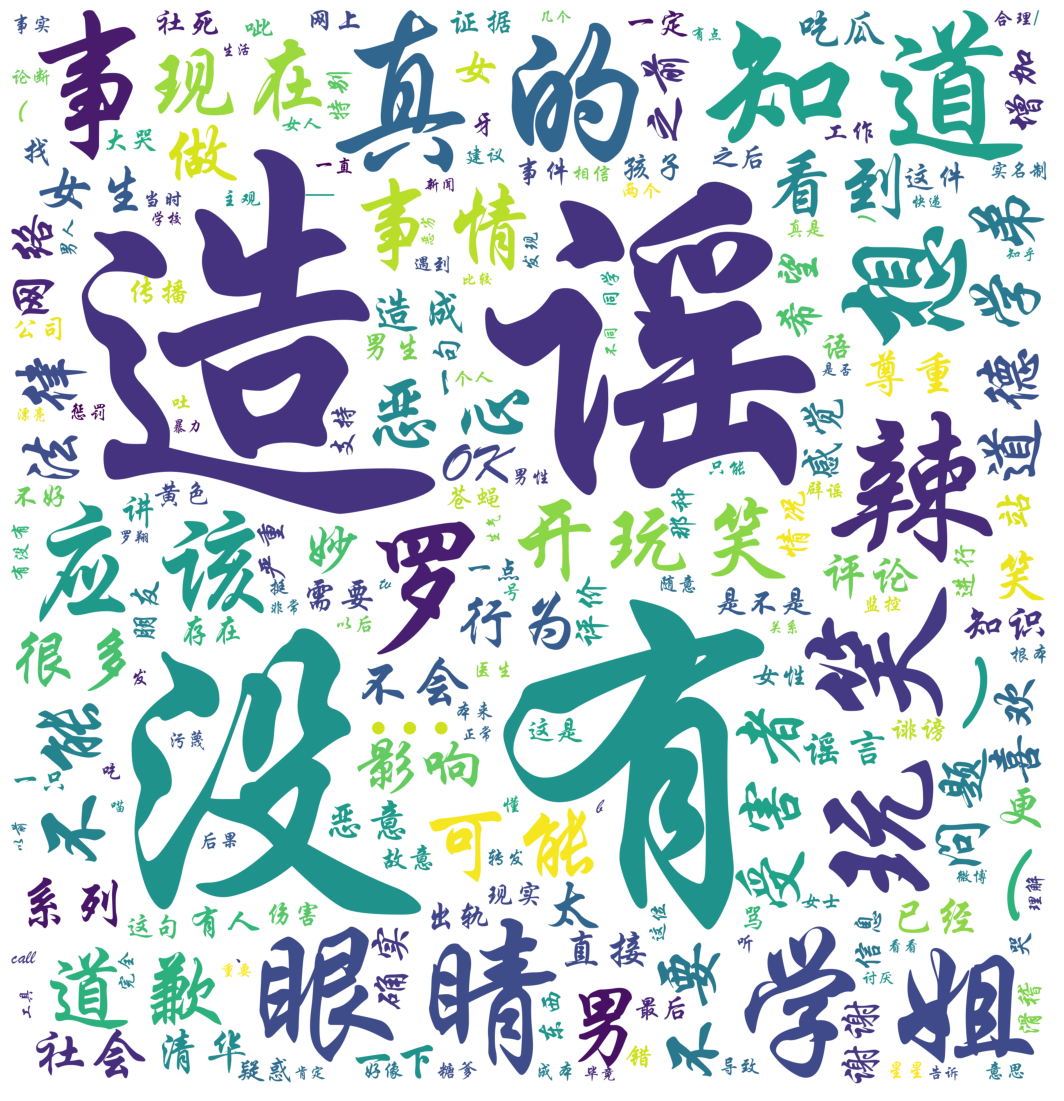

In [64]:
from wordcloud import WordCloud
import jieba
from tkinter import _flatten
from matplotlib.pyplot import imread
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
with open('cn_stopwords.txt', 'r', encoding='utf-8') as f:
    stopWords = f.read()
with open('hit_stopwords.txt','r',encoding='utf-8') as t:
    stopWord = t.read()
total = stopWord.split() + stopWords.split()
def my_word_cloud(data=None, stopWords=None, img=None):
    dataCut = data.apply(jieba.lcut)  # 分词
    dataAfter = dataCut.apply(lambda x: [i for i in x if i not in stopWords])  # 去除停用词
    wordFre = pd.Series(_flatten(list(dataAfter))).value_counts()  # 统计词频
    mask = plt.imread(img)
    plt.figure(figsize=(20,20))
    wc  = WordCloud(scale=10,font_path='C:/Windows/Fonts/STXINGKA.TTF',mask=mask,background_color='white',)
    wc.fit_words(wordFre)
    wc.to_file('x.png')
    plt.imshow(wc)
    plt.axis('off')
my_word_cloud(data=data["content"],stopWords=stopWords,img="1.jpg")

词云热词中最多的有造谣，学姐，真的，开玩笑等关键词。
从这些词中可以看出，大家对于此次事件，生活中开玩笑的恶意已经有些人对法律的漠视有着很广泛的讨论。